In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [82]:
def removeZenkakuSpace(df, cols):
    for col in cols:
        df[col] = df[col].str.replace('　', ' ')
    return df

def histEachFavs(df, col, height=5, aspect=4):
    for fav in sorted(df[FAV].unique()):
        sns.catplot(x=col,data=df.query(f"{FAV} == @fav"),kind='count',height=height, aspect=aspect)
        plt.title(f'fav group:{fav}')
        
def getQueries(df, cols):
    assert type(cols) == str or type(cols) == list, 'cols is str or list'
    queries = []
    if type(cols) == str:
        queries = [f'{cols} == {flag}' for flag in sorted(df[cols].unique())]
    elif type(cols) == list:
        for col in cols:
            col_queries = [f'{col} == {flag}' for flag in sorted(df[col].unique())]
            if len(queries) == 0:
                queries = col_queries
            else:
                queries = [f"{q} & {col_queries[0]}" for q in queries] + [f'{q} & {col_queries[1]}' for q in queries]
            
    return queries

def histColumnsFavs(df, cols, height=5, aspect=4):
    queries = getQueries(df, cols)
    for query in queries:
        data = df.query(query)
        if len(data) == 0:
            continue
        sns.catplot(x=FAV,data=data,kind='count',height=height, aspect=aspect)
        plt.title(query, fontname='Hackgen')
        
def histColumnHasWord(df, col, word):
    col_tmp = f'{col}_has_{word}'
    df[col_tmp] = df[col].str.contains(word).astype('int')
    histColumnsFavs(df, col_tmp)
    df = df.drop(col_tmp, axis=1)
    
    return df

In [7]:
out_dir = '../output'
train_df = pd.read_csv('../dataset/train.csv')
test_df = pd.read_csv('../dataset/test.csv')
ID = 'ncode'
FAV = 'fav_novel_cnt_bin'
favs = sorted(train_df[FAV].unique())

# train_df.userid = train_df.userid.astype('str')
# train_df.genre = train_df.genre.astype('str')
# test_df.userid = test_df.userid.astype('str')
# test_df.genre = test_df.genre.astype('str')
str_cols = ['title', 'story', 'keyword', 'writer']
for df in [train_df, test_df]:
    removeZenkakuSpace(df, str_cols)

In [8]:
train_df.columns

Index(['ncode', 'general_firstup', 'title', 'story', 'keyword', 'userid',
       'writer', 'biggenre', 'genre', 'novel_type', 'end', 'isstop', 'isr15',
       'isbl', 'isgl', 'iszankoku', 'istensei', 'istenni', 'pc_or_k',
       'fav_novel_cnt_bin'],
      dtype='object')

In [9]:
train_df.groupby('writer').count()

,ncode,general_firstup,title,story,keyword,userid,biggenre,genre,novel_type,end,isstop,isr15,isbl,isgl,iszankoku,istensei,istenni,pc_or_k,fav_novel_cnt_bin
writer,,,,,,,,,,,,,,,,,,,
,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
22世紀の精神異常者,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Ananclus,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
imomo,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
いばらき尊,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ｍｏｃｈａ,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
ｐｏｃｈｉｄａｎｇｏ,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
ｔｋ,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


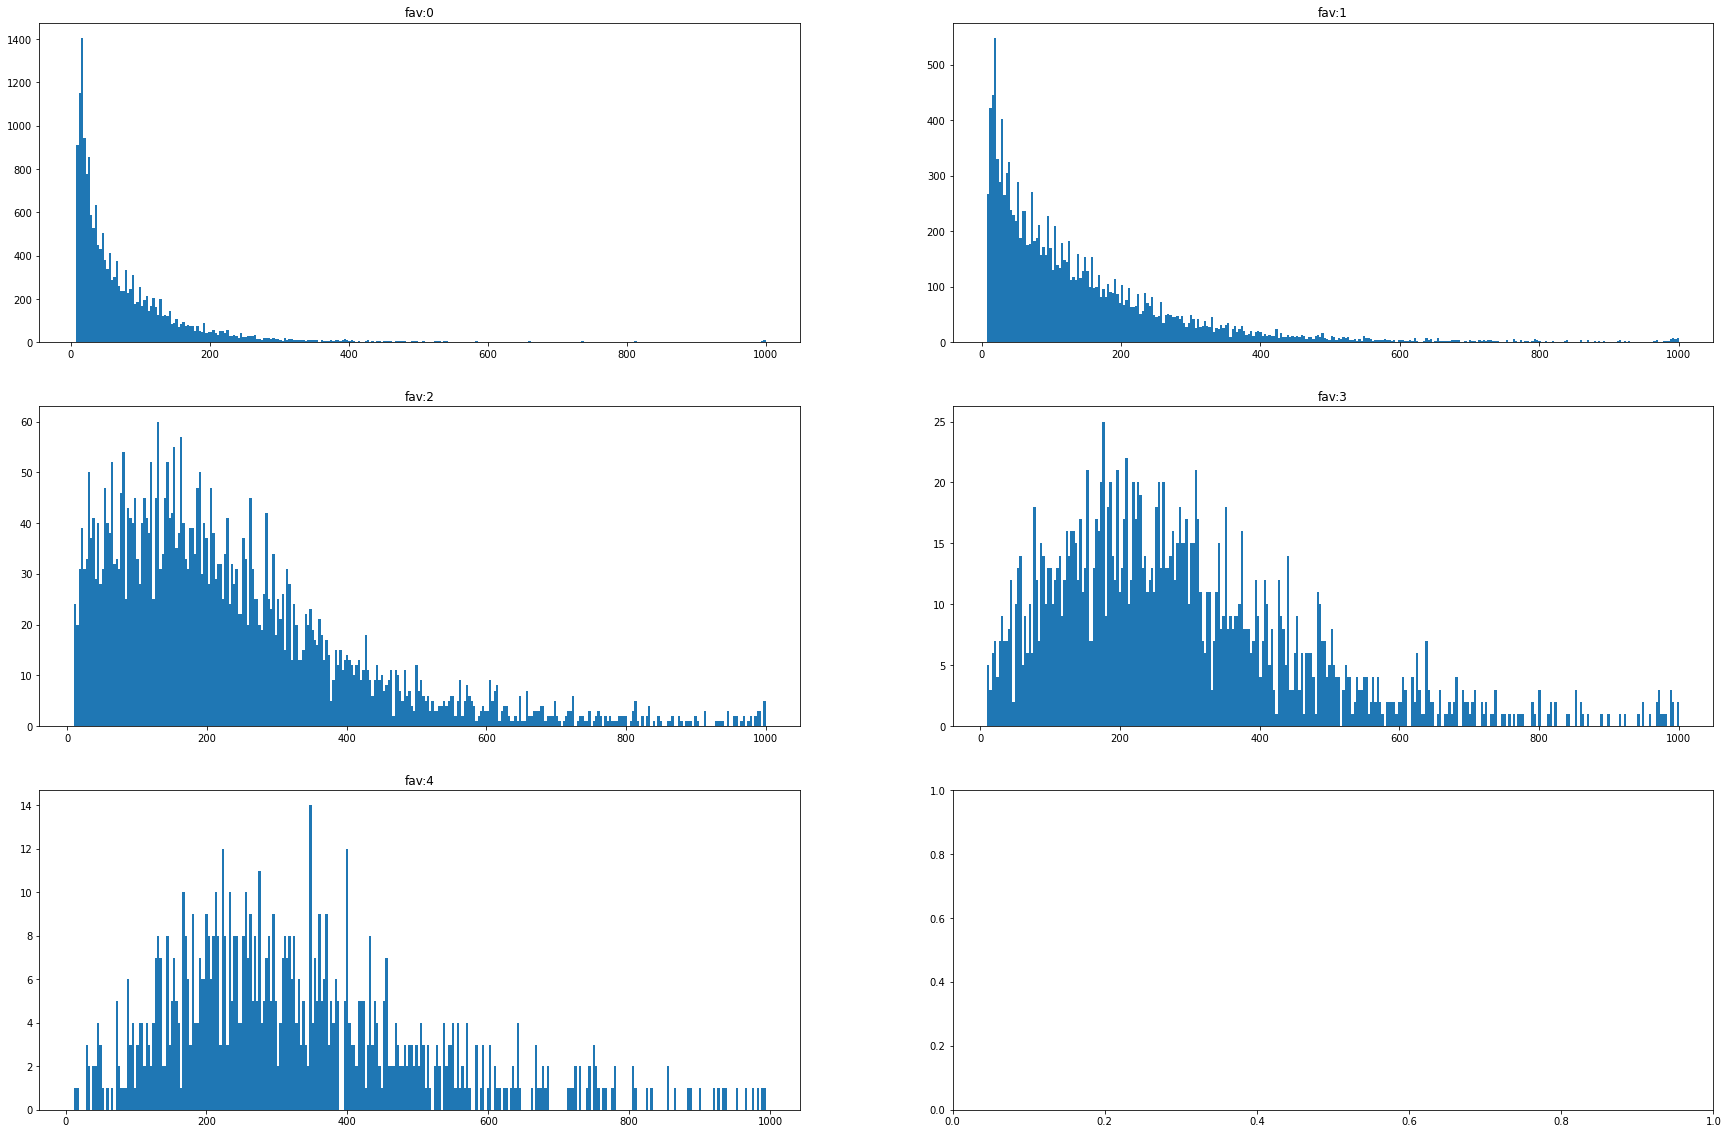

In [11]:
fig, axes = plt.subplots(figsize=(30,20), ncols=2, nrows=3)
for ax, fav in zip(axes.ravel(), favs):
    ax.hist(train_df.query(f'{FAV} == @fav')['story'].str.len(), bins=300)
    ax.set_title(f'fav:{fav}')

(0.0, 500.0)

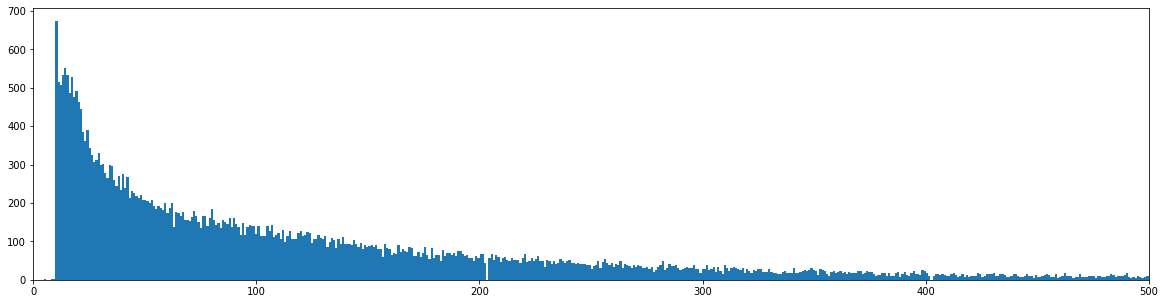

In [12]:
fig = plt.figure(figsize=(20,5))
plt.hist(train_df['story'].str.len(), bins=1000)
plt.xlim(0,500)

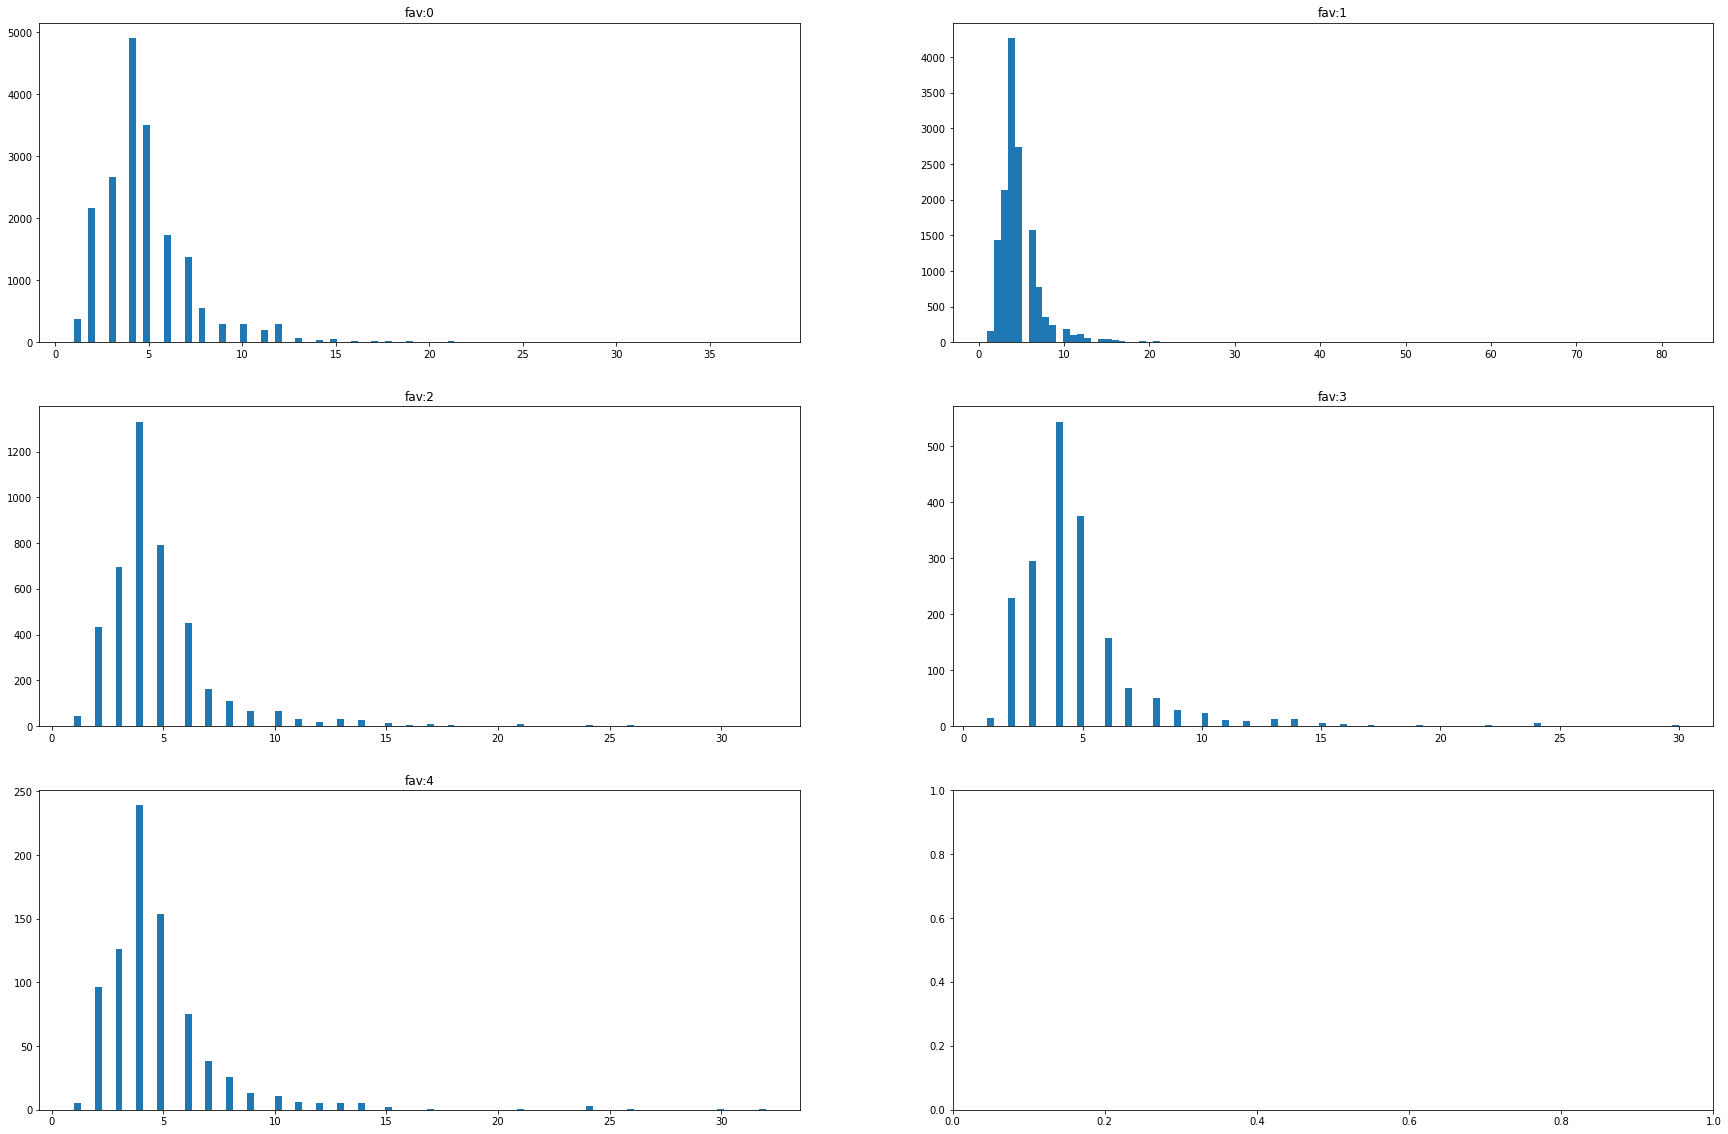

In [13]:
fig, axes = plt.subplots(figsize=(30,20), ncols=2, nrows=3)
for ax, fav in zip(axes.ravel(), favs):
    ax.hist(train_df.query(f'{FAV} == @fav')['writer'].str.len(), bins=100)
    ax.set_title(f'fav:{fav}')

/home/wsato/work/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ncode', ylabel='fav_novel_cnt_bin'>

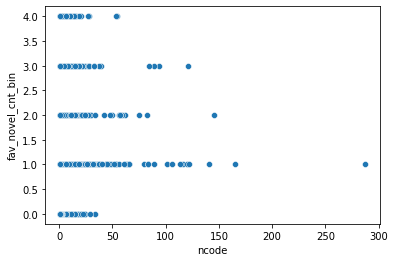

In [14]:
sns.scatterplot(train_df.groupby('writer').count()[ID],train_df.groupby('writer')[FAV].max())

(array([ 254., 1160., 1319., 2277., 2659., 2692., 2607., 2562., 2360.,
        2189., 2001., 1621., 1419., 1242., 1077.,  973.,  832.,  773.,
         722.,  722.,  631.,  554.,  535.,  524.,  462.,  424.,  373.,
         346.,  289.,  303.,  245.,  254.,  254.,  206.,  183.,  187.,
         145.,  147.,  126.,  143.,  141.,  119.,  103.,   84.,   91.,
          88.,   84.,   84.,   72.,   75.,   68.,   48.,   61.,   51.,
          38.,   48.,   50.,   35.,   32.,   29.,   33.,   34.,   25.,
          28.,   36.,   22.,   27.,   26.,   23.,   33.,   25.,   19.,
          21.,   17.,   24.,   20.,   16.,    9.,   15.,   20.,   13.,
          14.,    7.,   15.,   19.,   15.,   16.,   19.,   13.,   12.,
          15.,   16.,   13.,   14.,   17.,   12.,   17.,   20.,   67.]),
 array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
         23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  

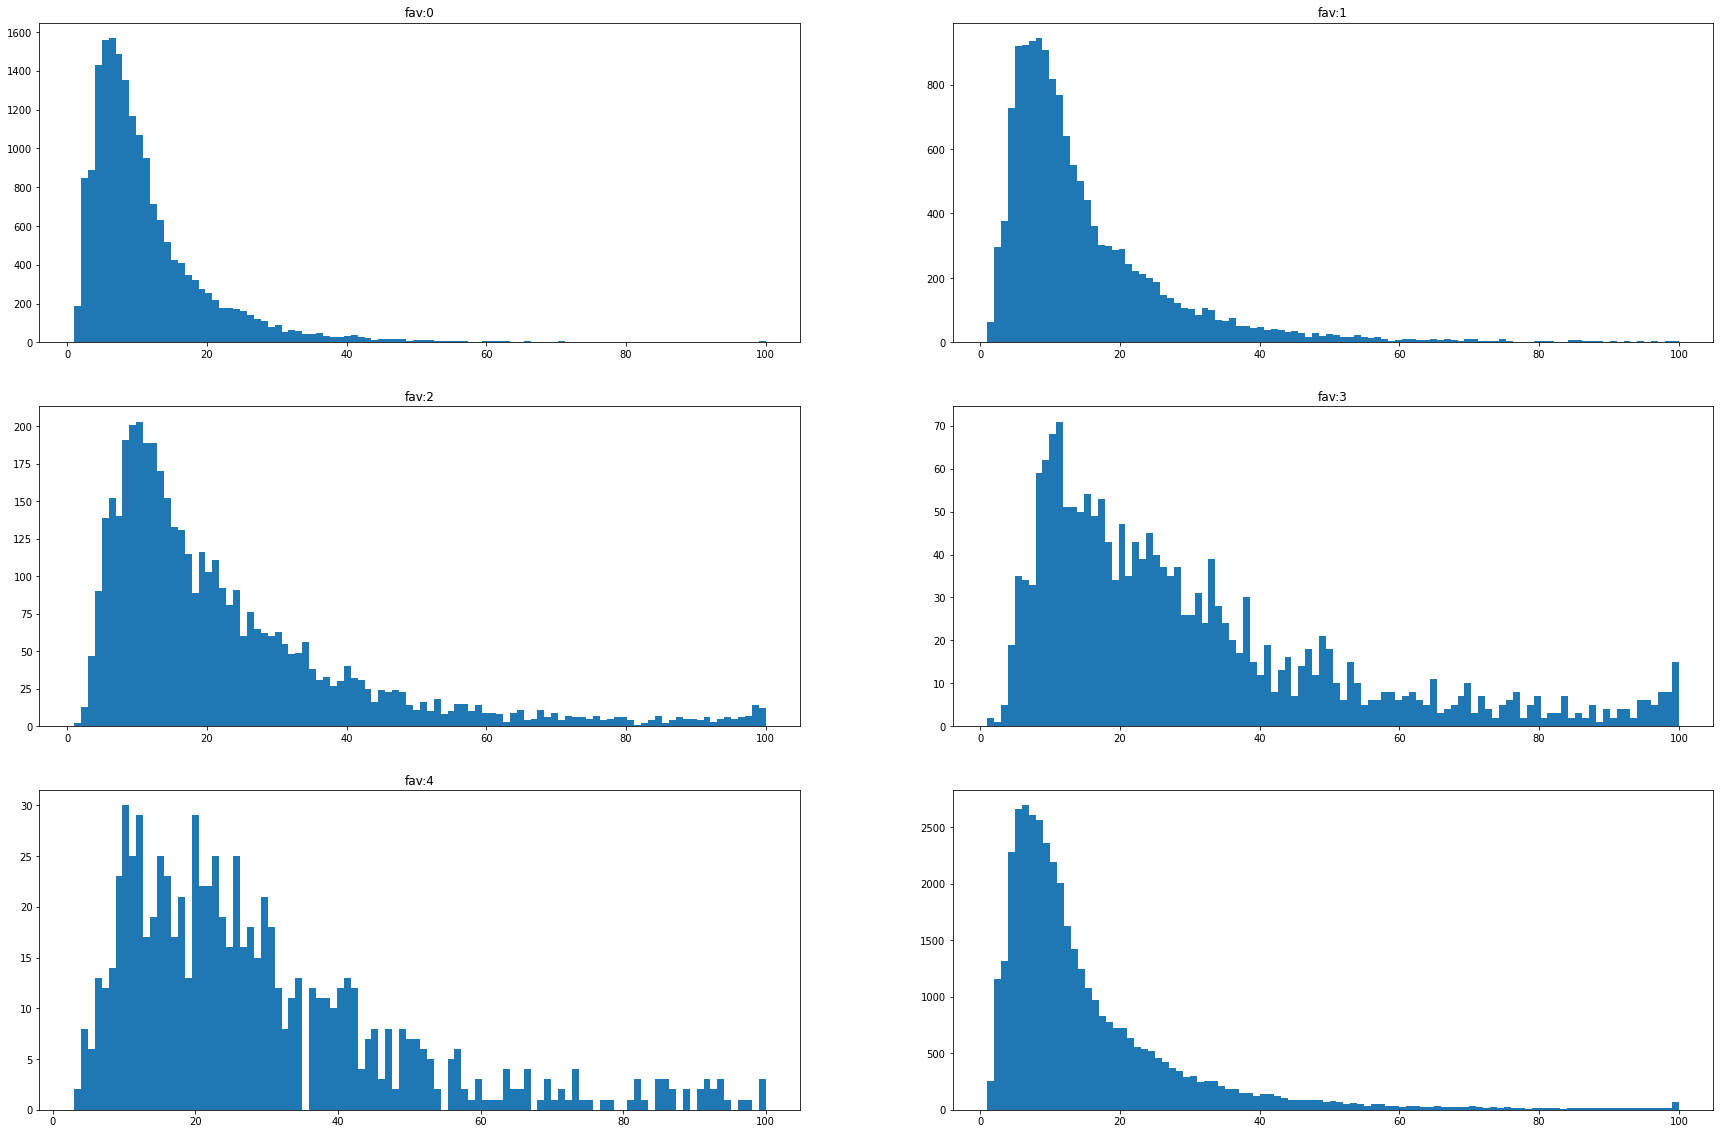

In [87]:
col = 'title'
fig, axes = plt.subplots(figsize=(30,20), ncols=2, nrows=3)
for ax, fav in zip(axes.ravel(), favs):
    ax.hist(train_df.query(f'{FAV} == @fav')[col].str.len(), bins=100)
    ax.set_title(f'fav:{fav}')
axes.ravel()[-1].hist(train_df[col].str.len(), bins=99)

In [24]:
train_df['title_has_space'] = train_df['title'].str.contains(' ').astype('int')
histColumnsFavs(train_df,'title_has_space')

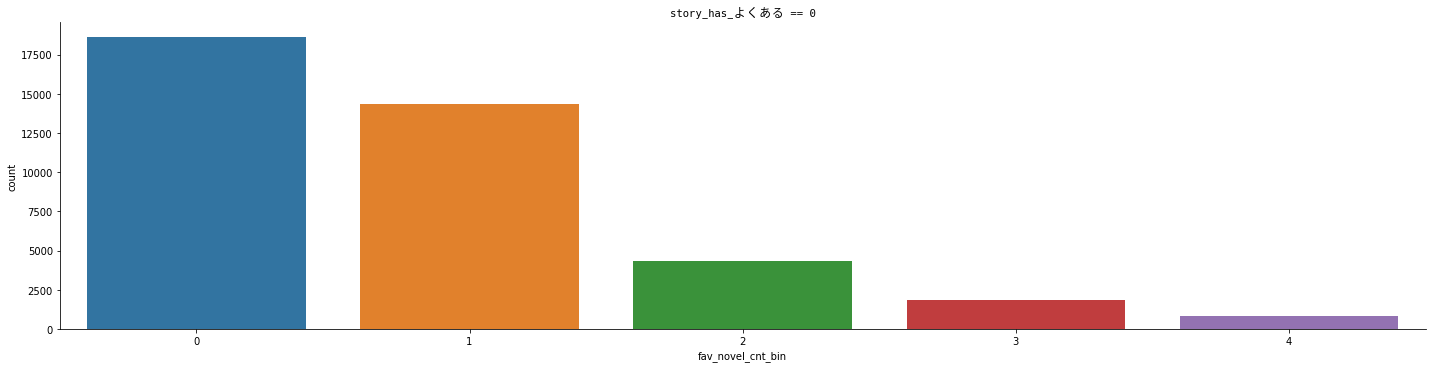

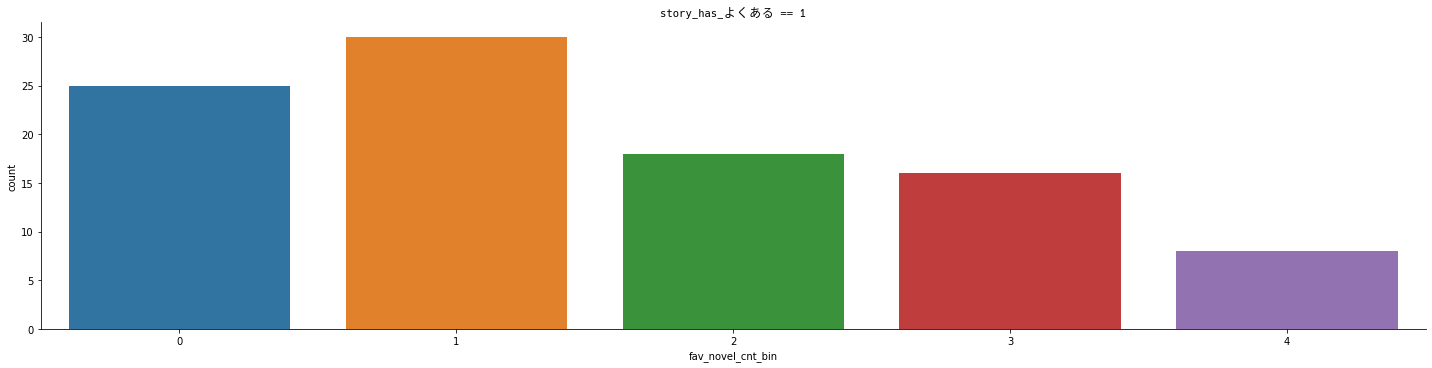

In [83]:
train_df = histColumnHasWord(train_df, 'story', 'よくある')

In [84]:
train_df.columns

Index(['ncode', 'general_firstup', 'title', 'story', 'keyword', 'userid',
       'writer', 'biggenre', 'genre', 'novel_type', 'end', 'isstop', 'isr15',
       'isbl', 'isgl', 'iszankoku', 'istensei', 'istenni', 'pc_or_k',
       'fav_novel_cnt_bin'],
      dtype='object')